## load a local picture

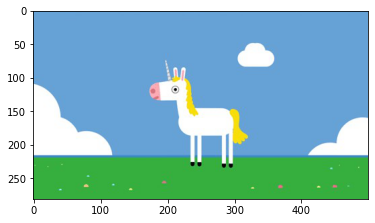

In [14]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

PROJECT_ROOT_DIR = '.'
filename = 'ladybug.png'
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
image = imread(os.path.join(images_path, filename))

image.shape

plt.imshow(image)

# reshape to rgb array: [r][g][b]
X = image.reshape(-1, 3)

## using GMM clustering on RGB space

In [12]:
from sklearn.mixture import GaussianMixture

gs = GaussianMixture(n_components=3, random_state=42).fit(X)

r_pred = gs.predict(X)

## model.means_ is the mean of the components

In [4]:
gs.means_

array([[0.05588814, 0.18513673, 0.00617583],
       [0.97263344, 0.89013026, 0.02120098],
       [0.3205288 , 0.42975139, 0.12287699]])

## model.predict predicts the index of aligned component for each pixel

In [5]:
r_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

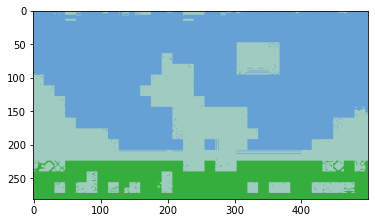

In [15]:
pic = gs.means_[r_pred]
pic = pic.reshape(image.shape)
plt.imshow(pic)

In [7]:
pred_idx = gs.predict(X)
pred_idx

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## try different number of components

In [8]:
segmented_imgs = []
n_components = (10, 8, 6, 4, 2)
for n_comp in n_components:
    gs = GaussianMixture(n_comp, random_state=42).fit(X)
    pred_idx = gs.predict(X)
    segmented_img = gs.means_[pred_idx]
    segmented_imgs.append(segmented_img.reshape(image.shape))

NameError: name 'n_colors' is not defined

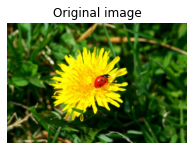

In [9]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()